<a href="https://colab.research.google.com/github/JoeHannemannUD/W23GEOG271JHannemann/blob/main/HW2_Joe_Hannemann_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pylab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pparks = pd.read_csv("http://data-phl.opendata.arcgis.com/datasets/d52445160ab14380a673e5849203eb64_0.csv")
pparks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OBJECTID                 514 non-null    int64  
 1   PUBLIC_NAME              514 non-null    object 
 2   PARENT_NAME              514 non-null    object 
 3   NESTED                   514 non-null    object 
 4   OFFICIAL_NAME            285 non-null    object 
 5   LABEL                    512 non-null    object 
 6   ALIAS                    353 non-null    object 
 7   DPP_ASSET_ID             514 non-null    int64  
 8   ADDRESS_911              506 non-null    object 
 9   ZIP_CODE                 514 non-null    int64  
 10  ADDRESS_BRT              430 non-null    object 
 11  ALIAS_ADDRESS            427 non-null    object 
 12  ACREAGE                  514 non-null    float64
 13  PROPERTY_CLASSIFICATION  514 non-null    object 
 14  PPR_USE                  5

In [4]:
pparks.shape

(514, 25)

In [5]:
pparks.columns

Index(['OBJECTID', 'PUBLIC_NAME', 'PARENT_NAME', 'NESTED', 'OFFICIAL_NAME',
       'LABEL', 'ALIAS', 'DPP_ASSET_ID', 'ADDRESS_911', 'ZIP_CODE',
       'ADDRESS_BRT', 'ALIAS_ADDRESS', 'ACREAGE', 'PROPERTY_CLASSIFICATION',
       'PPR_USE', 'PPR_DISTRICT', 'PPR_OPS_DISTRICT', 'COUNCIL_DISTRICT',
       'POLICE_DISTRICT', 'CITY_SCALE_MAPS', 'LOCAL_SCALE_MAPS',
       'PROGRAM_SITES', 'COMMENTS', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [6]:
pparks.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
0,1,Eastwick Regional Playground,Eastwick Regional Playground,N,Eastwick Regional Playground,Eastwick Regional,NaN,499,7899 MERCURY PL,19153,...,NaN,8,2,12,Y,Y,Y,NaN,159370.914062,3781.877533
1,2,Whitby Avenue Playground,Cobbs Creek Park,Y,NaN,Whitby,,1372,1300 COBBS CREEK PKY,19143,...,NaN,8,3,12,Y,Y,Y,NaN,38916.484375,949.498194
2,3,29th and Passyunk Park,29th and Passyunk Park,N,NaN,29th and Passyunk,,432,2827 W PASSYUNK AVE,19145,...,NaN,7,2,1,Y,Y,Y,NaN,3830.242188,247.032048
3,4,Price Street Play Lot,Price Street Play Lot,N,NaN,Price St,,826,185 W PRICE ST,19144,...,NaN,4,8,14,Y,Y,N,NaN,1249.839844,143.734003
4,5,Sedgley Woods Disc Golf Course,East Fairmount Park,Y,NaN,Sedgley Woods,,3013,3400 RESERVOIR DR,19121,...,NaN,5,4,22,Y,Y,N,NaN,210135.566406,1984.375466


In [7]:
pparks.tail()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
509,524,Tacony Creek Park,Tacony Creek Park,N,Tacony Creek Park,Tacony Creek Park,Brookwood Park,1961,NaN,19120,...,NaN,3,"7, 9","2, 15, 24, 25, 35",Y,Y,N,NaN,1.385218e+06,19003.764664
510,525,Franklin Delano Roosevelt Park,Franklin Delano Roosevelt Park,N,Franklin Delano Roosevelt (FDR) Park,FDR Park,League Island Park;The Lakes;FDR Park,231,3500 S BROAD ST,19145,...,NaN,7,2,1,Y,Y,N,NaN,2.388505e+06,6568.830576
511,526,Hunting Park,Hunting Park,N,NaN,Hunting,NaN,845,1101 W HUNTING PARK AVE,19140,...,NaN,3,5,25,Y,Y,Y,NaN,4.911561e+05,4036.792375
512,527,Awbury Park and Recreation Center,Awbury Park and Recreation Center,N,Awbury Park and Recreation Center,Awbury,NaN,604,6101 ARDLEIGH ST,19138,...,NaN,4,8,14,Y,Y,Y,Review the parcel boundaries,1.930695e+05,2019.278021
513,528,Fisher Park,Fisher Park,N,Fisher Park,Fisher,NaN,679,572 W SPENCER ST,19120,...,NaN,3,9,35,Y,Y,Y,NaN,1.693630e+05,1798.578647


In [8]:
meanps = pparks['ACREAGE'].mean()

In [9]:
medianps = pparks['ACREAGE'].median()

In [10]:
print("The Mean is :", meanps)
print("The Median is :", medianps)

The Mean is : 19.71751187344358
The Median is : 3.399723845


1. I can conclude that the values of the mean and median tell us that the data is not evenly distributed and is skewed towards the right
2. The distribution of the ACREAGE is not even and is more skewed towards the right(data has a lower bound)

<ipython-input-14-1bbe6aa8c9bb>:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([meanps, medianps], labels = ['mean', 'median'])


Text(0.5, 1.0, 'Histogram showing the distribution of park sizes in Philadephia, USA')

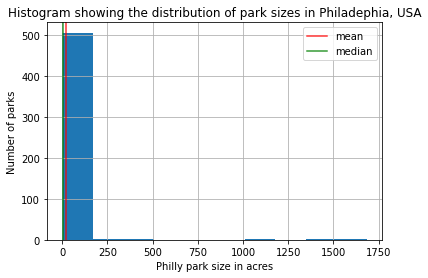

In [14]:
ax = pparks['ACREAGE'].hist(bins=10)
ax.axvline(meanps, color='red', linestyle='solid', linewidth=1.5, alpha = .8)
ax.axvline(medianps, color='green', linestyle='solid', linewidth=1.5, alpha = .8)
ax.legend([meanps, medianps], labels = ['mean', 'median'])
ax.set_xlabel('Philly park size in acres')
ax.set_ylabel('Number of parks')
pylab.title("Histogram showing the distribution of park sizes in Philadephia, USA")

3. The Graph is exaplaining the ratio of parks in Philly based on the size of the acres, the mean and the median are very close in numbers (the data set has almost a symmetrical distribution) tha more often than not the parks in Philly have around the same size give or take a few

In [17]:
stdps = round(pparks['ACREAGE'].std(), 4)
print("the standard deviation of the park sizes is" , stdps)

the standard deviation of the park sizes is 110.6165


In [18]:
ax = pparks[~(pparks["ACREAGE"]=="Unknown")]["ACREAGE"].unique()
smallparks = pparks.loc[pparks['ACREAGE'] < 10]
smallparks.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_DISTRICT,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length
1,2,Whitby Avenue Playground,Cobbs Creek Park,Y,NaN,Whitby,,1372,1300 COBBS CREEK PKY,19143,...,NaN,8,3,12,Y,Y,Y,NaN,38916.484375,949.498194
2,3,29th and Passyunk Park,29th and Passyunk Park,N,NaN,29th and Passyunk,,432,2827 W PASSYUNK AVE,19145,...,NaN,7,2,1,Y,Y,Y,NaN,3830.242188,247.032048
3,4,Price Street Play Lot,Price Street Play Lot,N,NaN,Price St,,826,185 W PRICE ST,19144,...,NaN,4,8,14,Y,Y,N,NaN,1249.839844,143.734003
5,6,Robert Wilson III Park,Cobbs Creek Park,Y,Robert Wilson III Park,Wilson,61st and Baltimore Ave Playground,3454,6100 BALTIMORE AVE,19143,...,NaN,8,3,12,Y,Y,Y,1911 Ordinance assigned to Department of Rec,8015.187500,360.391789
6,7,Rufus O Williams Memorial Playground,Cobbs Creek Park,Y,Rufus O. Williams Memorial Playground,R Williams,Cobbs Creek Playground,2128,700 COBBS CREEK PKY,19143,...,NaN,8,3,18,Y,Y,N,NaN,26413.429688,817.250366


In [19]:
meanspp = smallparks['ACREAGE'].mean()
medianspp = smallparks['ACREAGE'].median()
print("The Mean is ", meanspp)
print("The Median is ", medianspp)

The Mean is  2.872673753842365
The Median is  2.0584049149999997


<ipython-input-20-b97f161069ae>:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([meanspp, medianspp], labels = ['mean', 'median'])


Text(0.5, 1.0, 'Histogram showing the distribution of park size less than 10 acres in Philadephia, USA')

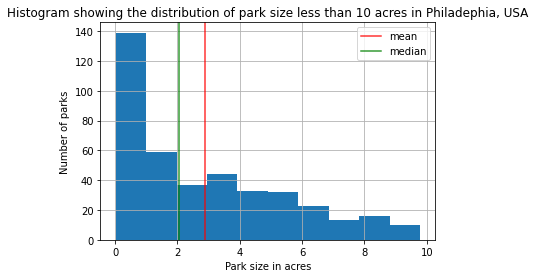

In [20]:
ax = smallparks['ACREAGE'].hist(bins=10)
ax.axvline(meanspp, color='red', linestyle='solid', linewidth=1.5, alpha = .8)
ax.axvline(medianspp, color='green', linestyle='solid', linewidth=1.5, alpha = .8)
ax.legend([meanspp, medianspp], labels = ['mean', 'median'])
ax.set_xlabel('Park size in acres')
ax.set_ylabel('Number of parks')
pylab.title("Histogram showing the distribution of park size less than 10 acres in Philadephia, USA")

In [21]:
group_park = pparks.groupby(['PARENT_NAME']).sum()
group_park

,OBJECTID,DPP_ASSET_ID,ZIP_CODE,ACREAGE,PPR_DISTRICT,Shape__Area,Shape__Length
PARENT_NAME,,,,,,,
10th and Lemon Playground,22,2914,19123,0.218885,0.0,1509.675781,169.494221
11th and Cecil B Moore Playground,164,1135,19122,5.181666,0.0,35754.375000,755.891229
12th and Cambria Playground,242,1800,19133,2.337374,0.0,16136.882812,542.995987
18th and Jackson War Memorial,365,1215,19145,0.083383,0.0,574.429688,148.363162
20th and Tioga Field,273,573,19140,1.195232,0.0,8254.367188,365.439378
...,...,...,...,...,...,...,...
Womrath Park,244,120,19124,2.167680,0.0,14970.460938,591.724807
Wooden Bridge Run,57,1632,19114,49.095667,0.0,339623.484375,4653.000056
Woodside Park,231,1840,19131,2.619728,0.0,18088.925781,615.286813


In [22]:
pair = pparks['ACREAGE'].groupby(pparks['Shape__Area'])
pair

In [23]:
#sns.pairplot(pparks[pair], size = 2.0)

In [24]:
groupmean = group_park['ACREAGE'].mean()
groupmedian = group_park['ACREAGE'].median()
print('The Mean of the grouped Parks is:', groupmean)
print('The Median of the grouped Parks is:', groupmedian)

The Mean of the grouped Parks is: 25.854084446301023
The Median of the grouped Parks is: 2.94766104


<ipython-input-25-1f650338f262>:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([groupmean, groupmedian], labels = ['mean', 'median'])


Text(0.5, 1.0, 'Histogram showing the distribution of parks grouped by parent name')

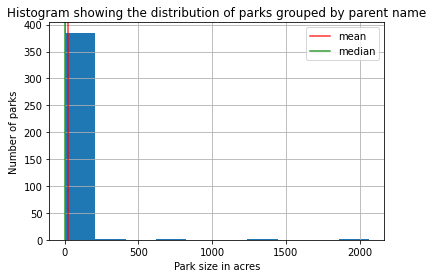

In [25]:
ax = group_park['ACREAGE'].hist()
ax.axvline(groupmean, color='red', linestyle='solid', linewidth=1.5, alpha = .8)
ax.axvline(groupmedian, color='green', linestyle='solid', linewidth=1.5, alpha = .8)
ax.legend([groupmean, groupmedian], labels = ['mean', 'median'])
ax.set_xlabel('Park size in acres')
ax.set_ylabel('Number of parks')

pylab.title("Histogram showing the distribution of parks grouped by parent name")

9. The graph means that the parks grouped by parent name is very similar to the data shown before in park sizes in Philly.
10. I could measure how the average park size in acres in Philly and parks grouped by parent name are similar and what other factors are more or less similar to park sizes and what differences that the minority of parks have that stands out in the data

In [26]:
group_stdp = round(group_park['ACREAGE'].std(), 4)
print("the standard deviation of the park sizes is" , group_stdp)

the standard deviation of the park sizes is 150.6956
